stability limit: 0.00031250000000000006


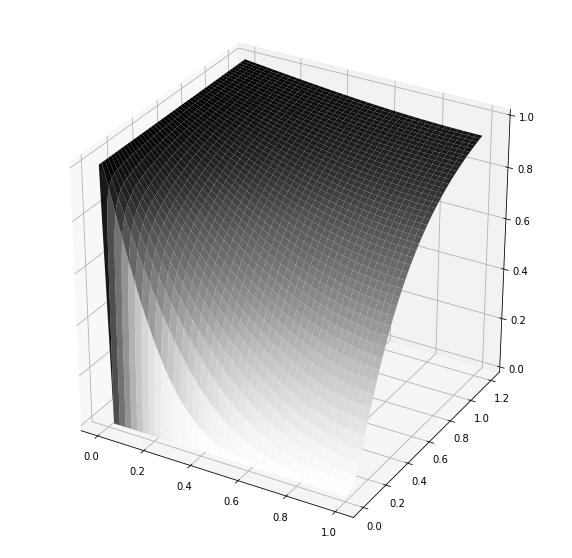

In [1]:
from numpy import linspace, zeros, linspace, asarray
import numpy as np
import time
from matplotlib import pyplot as plt

def rhs(u, t):
    N = len(u) - 1
    rhs = zeros(N+1)
    rhs[0] = dsdt(t)
    for i in range(1, N):
        rhs[i] = (beta/dx**2)*(u[i+1] - 2*u[i] + u[i-1]) + \
                 g(x[i], t)
    i = N
    rhs[i] = (beta/dx**2)*(2*u[i-1] + 2*dx*dudx(t) -
                           2*u[i]) + g(x[N], t)
    return rhs

def dudx(t):
    return 0

def s(t):
    return 1

def dsdt(t):
    return 0

def g(x, t):
    return 0

def ode_FE(f, U_0, dt, T):
    N_t = int(round(float(T)/dt))
    # Ensure that any list/tuple returned from f_ is wrapped as array
    f_ = lambda u, t: asarray(f(u,t))
    u = zeros((N_t+1, len(U_0)))
    t= linspace(0, N_t*dt, len(u))
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f_(u[n], t[n])
    return u, t

L = 1                # Rod Length
beta = 1       # K / rho * c K = heat conduction coefficient, rho = density, c = heat capacity
N = 40
x = linspace(0, L, N+1)
dx = x[1] - x[0]
u = zeros(N+1)

U_0 = zeros(N+1)
U_0[0] = s(0)
U_0[1:] = 0
dt = dx**2/(2*beta) # 0.0003125
print('stability limit:', dt)

u, t = ode_FE(rhs, U_0, dt, T=1.2)

from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

u = np.array(u)
#A = np.reshape(u,(int(time_steps),len(x)))

X,T = np.meshgrid(x,t)

surf = ax.plot_surface(X, T, u, cmap='Greys')

plt.show()
